In [1]:
using LinearAlgebra
using Plots

In [2]:
n = 7;
k = 6;
d = 5;
T = 100;

In [3]:
# create Y_i vector
function create_y(n,d)
    y = Matrix{Float64}[]
    max = 0;
    for i in 1:n
        A = rand(d,d);
        push!(y,A'*A);
        if eigmax(y[i]) > max
            max = eigmax(y[i]);
        end
    end
    for i in 1:n
        y[i] = y[i]/max;
    end
    return y;
end

# create Y_i vector
function create_diagonal_y(n,d)
    y = Matrix{Float64}[]
    max = 0;
    for i in 1:n
        A = zeros(d,d);
        for j in 1:d
            A[j,j] = rand();
        end
        push!(y,A);
        if eigmax(y[i]) > max
            max = eigmax(y[i]);
        end
    end
    for i in 1:n
        y[i] = y[i]/max;
    end
    return y;
end
y = create_y(n,d);

In [4]:
# define mu
function lambda_uniform_mu(n,k)
    lambdas = rand(n);
    tot = 0;
    mu = zeros(2^n);
    for s in 1:2^n
        if count_ones(s) == k
            mu[s] = 1;
            for i in 1:n
                if (s÷(2^(i-1)))%2==1
                    mu[s] *= 1/lambdas[i]^2;
                end
            end
            tot += mu[s];
        end
    end
    # normalize
    for s in 1:2^n
        if count_ones(s) == k
            mu[s] = mu[s]/tot;
        end
    end
    return mu;
end

function get_marginals_mu(mu)
    mu_1 = zeros(n);
    for j in 1:n
        for i in 1:2^n
           if (count_ones(i)==k) && ((i÷(2^(j-1)))%2==1)
                mu_1[j] += mu[i]/k;
            end
        end
    end
    return mu_1;    
end

mu = lambda_uniform_mu();


LoadError: MethodError: no method matching lambda_uniform_mu()
[0mClosest candidates are:
[0m  lambda_uniform_mu([91m::Any[39m, [91m::Any[39m) at In[4]:2

$$ tr(f\circ u(t)) = tr\left( \sum_S \mu(S) \exp\left(\sum_{i \in S} \log\left((1-t)I+t\exp(y_i)\right)\right) \right)$$

In [5]:
n = 9;
k = 4;

d = 1;

mu = k_dpp_mu(n,k);
y = create_y(n,d);

# compute trace f(u(.)) function
fu = zeros(T);
for t in 1:T
    for s in 1:2^n
        if count_ones(s) == k
            p_s = zeros(d,d);
            for i in 1:n
                if (s÷(2^(i-1)))%2==1
                    p_s += log(t/T*exp(y[i])+(T-t)/T*I);
                end
            end
            fu[t] += tr(mu[s]*exp(p_s));
        end
    end
end

# plot fu
graph_fu = plot(fu);

@show graph_fu

LoadError: UndefVarError: k_dpp_mu not defined

In [6]:
log_fu = zeros(T);
for t in 1:T
    log_fu[t] = log(fu[t]);
end

# plot log fu
@show plot(log_fu)

LoadError: UndefVarError: fu not defined

In [7]:
fu_1_k = zeros(T);
for t in 1:T
    fu_1_k[t] = fu[t]^(1/k);
end

# plot log fu
@show plot(fu_1_k ,markershape = :ltriangle)

LoadError: UndefVarError: fu not defined

plot(log_fu_dot_dot) = Plot{Plots.GRBackend() n=1}


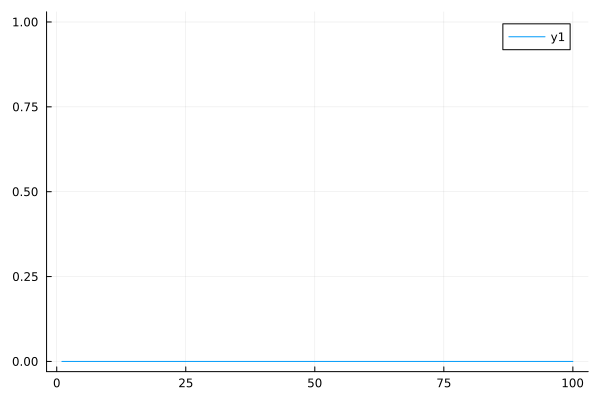

In [8]:
# is it concave?

log_fu_dot_dot = zeros(T);
for t in 3:T
    log_fu_dot_dot[t] = T^2*(log_fu[t-2]+log_fu[t]-2*log_fu[t-1]);
end

# plot log fu
@show plot(log_fu_dot_dot)


In [9]:
fu_1_k = zeros(T);
for t in 1:T
    fu_1_k[t] = fu[t]^(1/k);
end

# plot log fu
graph_fu_1_k = plot(fu_1_k ,markershape = :ltriangle);

@show graph_fu_1_k

# is it concave?

fu_1_k_dot_dot = zeros(T);
for t in 3:T
    fu_1_k_dot_dot[t] = T^2*(fu_1_k[t-2]+fu_1_k[t]-2*fu_1_k[t-1]);
end

# plot log fu
graph_fu_1_k_dot_dot = plot(fu_1_k_dot_dot);

@show graph_fu_1_k_dot_dot

LoadError: UndefVarError: fu not defined

plot(diff[3:T]) = Plot{Plots.GRBackend() n=1}


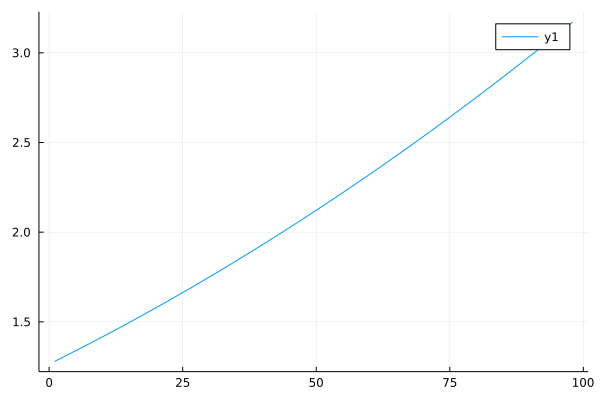

In [155]:
# diff = (h')^2-h h"

fu_dot = zeros(T);
fu_dot_dot = zeros(T);

diff = zeros(T);

for t in 3:T
    fu_dot[t] = T*(fu[t]-fu[t-1]);
    fu_dot_dot[t] = T^2*(fu[t-2]+fu[t]-2*fu[t-1]);
    diff[t] = fu_dot[t]^2-fu[t]*fu_dot_dot[t];
end

@show plot(diff[3:T])

## Log version

Check the steps in $\dagger \implies \ddagger$

\begin{equation}\tag{$\ddagger$}
tr\left( \sum_S \mu(S) \exp\left(\sum_{i \in S} \log\left((1-t)I+t\exp(y_i)\right)\right) \right) \leq tr\left( \exp(t k \left(\sum_i \mu^{(1)}(i)\exp(y_i) -I\right) ) \right)
\end{equation}

In [166]:
n = 9;
k = 4;

d = 1;

mu = k_dpp_mu(n,k);
y = create_y(n,d);




fu = zeros(T);
for t in 1:T
    for s in 1:2^n
        if count_ones(s) == k
            p_s = zeros(d,d);
            for i in 1:n
                if (s÷(2^(i-1)))%2==1
                    p_s += log(t/T*exp(y[i])+(T-t)/T*I);
                end
            end
            fu[t] += tr(mu[s]*exp(p_s));
        end
    end
end


# compute mu^(1)
mu_1 = zeros(n);
for j in 1:n
    for i in 1:2^n
       if (count_ones(i)==k) && ((i÷(2^(j-1)))%2==1)
            mu_1[j] += mu[i]/k;
        end
    end
end
# compute h'(0)
h_dot_0 = zeros(d,d);
for i in 1:n
    h_dot_0 += mu_1[i]*exp(y[i])
end
h_dot_0 = k*(h_dot_0-I);

rhs_ddagger = zeros(T);
for t in 1:T
    rhs_ddagger[t] = tr(exp(t/T*h_dot_0));
end

plot(merge) = Plot{Plots.GRBackend() n=2}


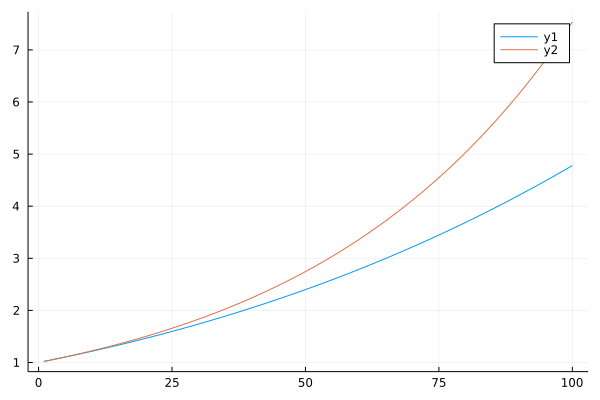

In [167]:
merge = zeros(T,2);
for t in 1:T
    merge[t,1] = fu[t];
    merge[t,2] = rhs_ddagger[t];
end

@show plot(merge)


plot(merge[1:20, :]) = Plot{Plots.GRBackend() n=2}


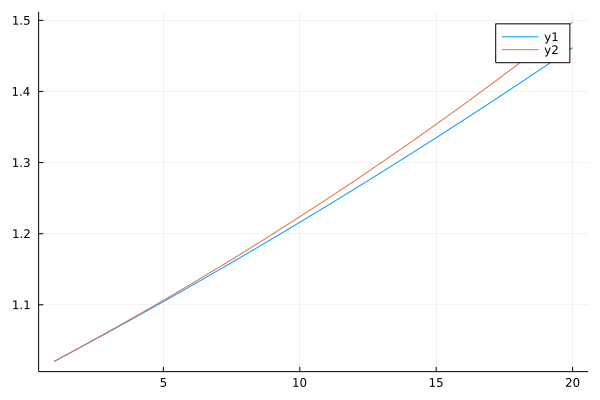

In [168]:
@show plot(merge[1:20,:])

plot(merge) = Plot{Plots.GRBackend() n=2}


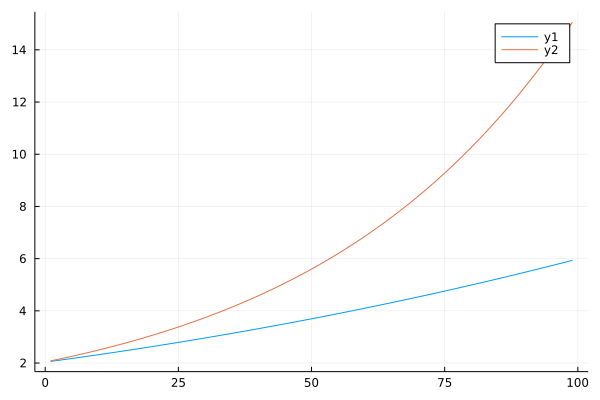

In [169]:
lhs_dstar = zeros(T);

for t in 2:T
    lhs_dstar[t] = T*(fu[t]-fu[t-1]);
end

rhs_dstar = zeros(T);


for t in 2:T
    rhs_dstar[t] = T*(rhs_ddagger[t]-rhs_ddagger[t-1]);
end

merge = zeros(T-1,2);
for t in 2:T
    merge[t-1,1] = lhs_dstar[t];
    merge[t-1,2] = rhs_dstar[t];
end

@show plot(merge)



plot(merge[1:15, 1:2]) = Plot{Plots.GRBackend() n=2}


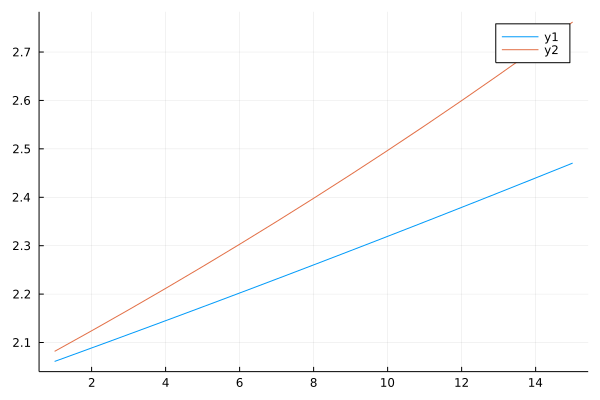

In [170]:
@show plot(merge[1:15,1:2])

Is $\ddagger$ false??


Check that if we take $tr(\log(f\circ u))$ then this is concave.

In [14]:
# check ddagger !!!

# and the drivatives

N_iter = 1000;

n = 6;
k = 2;

d = 3;

conj = true;
iter = 0;
while conj && iter<N_iter
    
    mu = sparse_distribution(n,k);
    
    y = create_y(n,d);
    
    # compute lhs aka fu
    fu = zeros(T);
    for t in 1:T
        for s in 1:2^n
            if count_ones(s) == k
                p_s = zeros(d,d);
                for i in 1:n
                    if (s÷(2^(i-1)))%2==1
                        p_s += log(t/T*exp(y[i])+(T-t)/T*I);
                    end
                end
                fu[t] += tr(mu[s]*exp(p_s));
            end
        end
    end


    # compute rhs
    mu_1 = get_marginals_mu(mu);
    # compute h'(0)
    h_dot_0 = zeros(d,d);
    for i in 1:n
        h_dot_0 += mu_1[i]*exp(y[i])
    end
    h_dot_0 = k*(h_dot_0-I);

    rhs_ddagger = zeros(T);
    for t in 1:T
        rhs_ddagger[t] = tr(exp(t/T*h_dot_0));
    end
    
    
    # check the inequality
    for t in 1:T
        if rhs_ddagger[t] < fu[t]
            conj = false;
        end
    end
    
    # check the inequality between derivatives
    for t in 2:T
        if rhs_ddagger[t]-rhs_ddagger[t-1] < fu[t]-fu[t-1]
            conj = false;
        end
    end
    iter += 1;
end

@show iter
@show conj

iter = 1000
conj = true


true

graph_tr_log_fu = Plot{Plots.GRBackend() n=1}


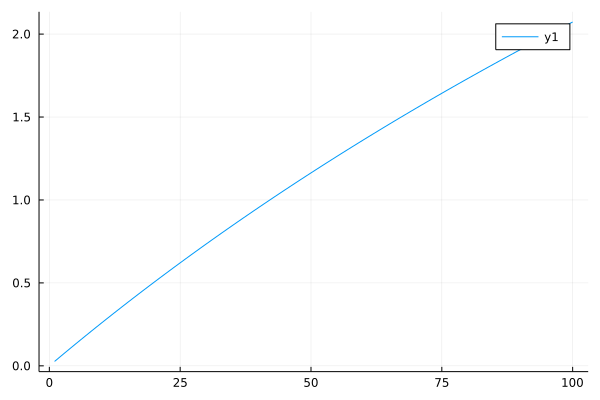

In [303]:
# compute f(u(.)) function
mat_fu = Matrix{Float64}[];
for t in 1:T
    push!(mat_fu, zeros(d,d));
    for s in 1:2^n
        if count_ones(s) == k
            p_s = zeros(d,d);
            for i in 1:n
                if (s÷(2^(i-1)))%2==1
                    p_s += log(t/T*exp(y[i])+(T-t)/T*I);
                end
            end
            mat_fu[t] += mu[s]*exp(p_s);
        end
    end
end

tr_log_fu = zeros(T);
for t in 1:T
    tr_log_fu[t] = tr(log(mat_fu[t]));
end
# plot tr log fu
graph_tr_log_fu = plot(tr_log_fu);

@show graph_tr_log_fu

## ^$1/k$ version

\begin{equation}\tag{$\circledast$}
tr\left( \sum_S \mu(S) \exp\left(\sum_{i \in S} \log\left((1-t)I+t\exp(y_i)\right)\right) \right) \leq tr \left( \left((1-t)I+ t\sum_i \mu^{(1)}(i)\exp(y_i) \right)^{k} \right)
\end{equation}

In [182]:
# the lhs is the same as ddagger

fu = zeros(T);
for t in 1:T
    for s in 1:2^n
        if count_ones(s) == k
            p_s = zeros(d,d);
            for i in 1:n
                if (s÷(2^(i-1)))%2==1
                    p_s += log(t/T*exp(y[i])+(T-t)/T*I);
                end
            end
            fu[t] += tr(mu[s]*exp(p_s));
        end
    end
end

# comput the rhs

rhs_cast = zeros(T);
mu_1 = get_marginals_mu(mu);
h_dot_0 = zeros(d,d);
for i in 1:n
    h_dot_0 += mu_1[i]*exp(y[i])
end
h_dot_0 = k*(h_dot_0-I);

for t in 1:T
    rhs_cast[t] = tr((t/T*h_dot_0/k+I)^k)
end

plot(merge) = Plot{Plots.GRBackend() n=2}


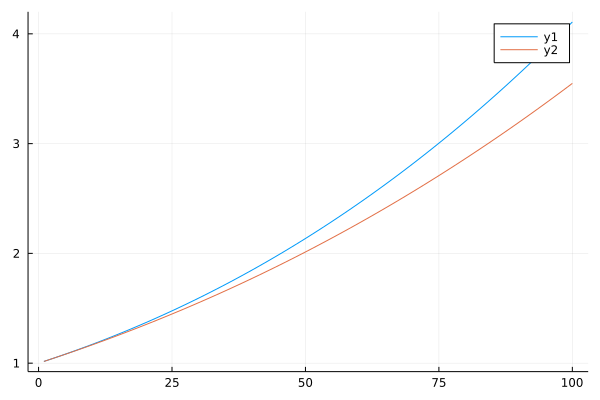

In [183]:
merge = zeros(T,2);
for t in 1:T
    merge[t,1] = fu[t];
    merge[t,2] = rhs_cast[t];
end

@show plot(merge)

plot(merge[1:100, 1:2]) = Plot{Plots.GRBackend() n=2}


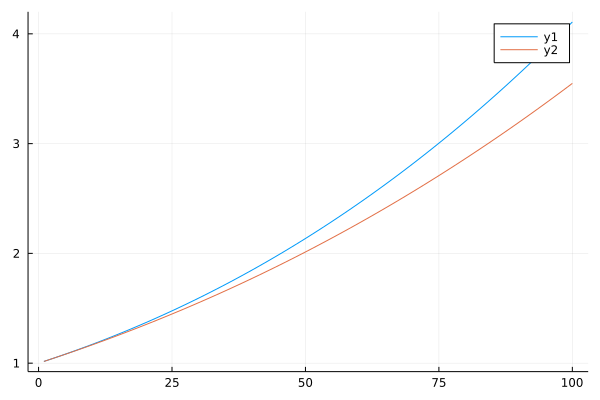

In [184]:
@show plot(merge[1:100,1:2])

In [9]:
# check cast !!!
# and its derivative
N_iter = 1000;

n = 6;
k = 3;

d = 3;

conj = true;
iter = 0;
while conj && iter<N_iter
    
    mu = one_ising_model(n,k);
    
    y = create_y(n,d);
    
    # compute lhs aka fu
    fu = zeros(T);
    for t in 1:T
        for s in 1:2^n
            if count_ones(s) == k
                p_s = zeros(d,d);
                for i in 1:n
                    if (s÷(2^(i-1)))%2==1
                        p_s += log(t/T*exp(y[i])+(T-t)/T*I);
                    end
                end
                fu[t] += tr(mu[s]*exp(p_s));
            end
        end
    end


    # compute rhs
    rhs_cast = zeros(T);
    mu_1 = get_marginals_mu(mu);
    h_dot_0 = zeros(d,d);
    for i in 1:n
        h_dot_0 += mu_1[i]*exp(y[i])
    end
    h_dot_0 = k*(h_dot_0-I);

    for t in 1:T
        rhs_cast[t] = tr((t/T*h_dot_0/k+I)^k)
    end
    
    
    # check the inequality
    for t in 1:T
        if rhs_cast[t] < fu[t]
            conj = false;
        end
    end
    
    # check the inequality beteween derivatives
    for t in 2:T
        if rhs_cast[t]-rhs_cast[t-1] < fu[t]-fu[t-1]
            println("Derivative fails.")
            conj = false;
            break;
        end
    end
    iter += 1;
end

@show iter
@show conj

iter = 1000
conj = true


true

Check that $\left(tr(f\circ u)\right)^{\frac{1}{k}}$ is always concave!

In [185]:
n = 7;
k = 6;

N_iter = 100;
T = 100;

y = create_y();
iter = 0;
conj = true;
while (iter < N_iter) && conj
    # define mu
    mu = lambda_uniform_mu();
    # compute trace f u
    fu = zeros(T);
    for t in 1:T
        for s in 1:2^n
            if count_ones(s) == k
                p_s = zeros(d,d);
                for i in 1:n
                    if (s÷(2^(i-1)))%2==1
                        p_s += log(t/T*exp(y[i])+(T-t)/T*I);
                    end
                end
                fu[t] += tr(mu[s]*exp(p_s));
            end
        end
    end
    # compute h^(1/k)
    fu_1_k = zeros(T);
    for t in 1:T
        fu_1_k[t] = fu[t]^(1/k);
    end
    #check concavity
    for t in 3:T
       if fu_1_k[t]+fu_1_k[t-2]-2*fu_1_k[t-1] < 0
            conj = false;
        end
    end
    iter += 1;
end
@show conj
@show iter

conj = false
iter = 1


1

In [272]:
# Test that the code fail if we substitute ^1/k with log

N_iter = 100;
T = 100;
d = 5;
n = 7;
k = 4;

iter = 0;
conj = true;
while (iter < N_iter) && conj
    # define mu
    mu = lambda_uniform_mu(n,k);
    y = create_y(n,d)
    # compute trace f u
    fu = zeros(T);
    for t in 1:T
        for s in 1:2^n
            if count_ones(s) == k
                p_s = zeros(d,d);
                for i in 1:n
                    if (s÷(2^(i-1)))%2==1
                        p_s += log(t/T*exp(y[i])+(T-t)/T*I);
                    end
                end
                fu[t] += tr(mu[s]*exp(p_s));
            end
        end
    end
    # compute log(h)
    log_fu = zeros(T);
    for t in 1:T
        log_fu[t] = log(fu[t]);
    end
    #check concavity
    for t in 3:T
       if log_fu[t]+log_fu[t-2]-2*log_fu[t-1] > 0
            conj = false;
        end
    end
    iter += 1;
end
@show conj
@show iter

conj = false
iter = 1


1

Now test it for different distributions

In [6]:
function one_ising_model(
        n::Int64,
        k::Int64)
    if n != 2*k
        println("Check n and k.");
    end
    n_2 = n÷2;

    # parameters u and h
    u = zeros(n_2);
    h = rand(n_2)/n;
    tot = 0;
    for i in 1:n_2
        u[i] = 1/rand()^5-1;
        tot += u[i]^2;        
    end
    # normalize u
    for i in 1:n_2
        u[i] = u[i]/sqrt(tot)/10;  
    end
    

    mu_not_homog = zeros(2^n_2);
    tot = 0;
    for s in 1:2^n_2
        u_scalar_x = 0;
        h_scalar_x = 0;
        for i in 1:n_2
            if s÷(2^(i-1))%2==1
                u_scalar_x += u[i];
                h_scalar_x += h[i];
            end
        end
        mu_not_homog[s] = exp(u_scalar_x^2/2+h_scalar_x);
        tot += mu_not_homog[s]; 
    end

    mu = zeros(2^n);
    for s in 1:2^n
        if (count_ones(s) == n_2) && ((s÷(2^n_2))+(s%2^n_2) == 2^n_2-1) && s%(2^n_2) != 0
            mu[s] = mu_not_homog[s%(2^n_2)]/tot;
        end
    end
    mu[2^n-2^n_2] = mu_not_homog[2^n_2]/tot;
    return mu
end;

function two_spin_system(
        n::Int64,
        k::Int64)
    if n != 2*k
        println("Check n and k.");
    end
    # antiferromagentic 2-spin system
    beta = 0;
    gamma = 1.1;
    lambda = 0.8;

    n_2 = n÷2;

    # star graph 
    # the center is node 0

    mu_not_homog = zeros(2^n_2);
    tot = 0;
    for s in 1:2^n_2
        mu_not_homog[s] = 0;
        if s%2 == 0
            m_0 = 0;
            for i in 2:n_2
                if s÷(2^(i-1))%2==0
                    m_0 += 1;
                end
            end
            mu_not_homog[s] = gamma^m_0*lambda^(n_2-m_0-1);
        else
            m_1 = 0;
            for i in 2:n_2
                if s÷(2^(i-1))%2==1
                    m_1 += 1;
                end
            end
            mu_not_homog[s] = beta^m_1*lambda^(m_1+1);
        end
        tot += mu_not_homog[s];
    end
    mu = zeros(2^n);
    for s in 1:2^n
        if (count_ones(s) == n_2) && ((s÷(2^n_2))+(s%2^n_2) == 2^n_2-1) && s%(2^n_2) != 0
            mu[s] = mu_not_homog[s%(2^n_2)]/tot;
        end
    end
    mu[2^n-2^n_2] = mu_not_homog[2^n_2]/tot;
    
    return mu;
end;

function sparse_distribution(
        n::Int64,
        k::Int64)
    if n%k != 0
        println("check n and k.");
    end
    mu = zeros(2^n);
    for i in 1:n÷k
        s = 0;
        for j in 0:k-1
            s += 2^(k*(i-1)+j);
        end
        mu[s] = 1/(n÷k);
    end
    return mu;
end;

function k_dpp_mu(
        n::Int64,
        k::Int64)
    A = rand(n,n);
    matrix =  A'*A;

    mu = zeros(2^n);
    tot = 0;
    for s in 1:2^n
        if count_ones(s) == k
            index = [];
            for i in 1:n
                if s÷(2^(i-1))%2==1
                    push!(index,i);
                end
            end
            mu[s] = det(matrix[index,index]);
            tot += mu[s];
        end
    end

    for s in 1: 2^n
        mu[s] = mu[s]/tot;
    end
    return mu;
end;

function dpp_mu(
        n::Int64,
        k::Int64)
    if n != 2*k
        println("Check n and k!");
    end
    n_2 = k;
    A = rand(n_2,n_2);
    matrix =  A'*A;

    mu_not_homog = zeros(2^n_2);
    tot = 0;
    for s in 1:2^n_2
        index = [];
        for i in 1:n_2
            if s÷(2^(i-1))%2==1
                push!(index,i);
            end
        end
        mu_not_homog[s] = det(matrix[index,index]);
        tot += mu_not_homog[s];
    end
    
    mu = zeros(2^n);
    for s in 1:2^n
        if (count_ones(s) == n_2) && ((s÷(2^n_2))+(s%2^n_2) == 2^n_2-1) && s%(2^n_2) != 0
            mu[s] = mu_not_homog[s%(2^n_2)]/tot;
        end
    end
    mu[2^n-2^n_2] = mu_not_homog[2^n_2]/tot;
    
    return mu;
end;

function bad_mu(n::Int64,k::Int64)
    mu = zeros(2^n);
    tot = 0;
    for s in 1:2^n
        if count_ones(s) == k
            mu[s] = 1/rand()^5-1;
            tot += mu[s];
        end
    end
    for s in 1:2^n
        mu[s] = mu[s]/tot;
    end
    return mu;
end;

In [7]:
n = 8;
k = 4;
d = 3;


N_iter = 100;
T = 100;


iter = 0;
conj = true;
while (iter < N_iter) && conj
    # define mu
    mu = two_spin_system(n,k);
    y = create_y(n,d);
    # compute trace f u
    fu = zeros(T);
    for t in 1:T
        for s in 1:2^n
            if count_ones(s) == k
                p_s = zeros(d,d);
                for i in 1:n
                    if (s÷(2^(i-1)))%2==1
                        p_s += log(t/T*exp(y[i])+(T-t)/T*I);
                    end
                end
                fu[t] += tr(mu[s]*exp(p_s));
            end
        end
    end
    # compute h^(1/k)
    fu_1_k = zeros(T);
    for t in 1:T
        fu_1_k[t] = fu[t]^(1/k);
    end
    #check concavity
    for t in 3:T
       if fu_1_k[t]+fu_1_k[t-2]-2*fu_1_k[t-1] > 0
            conj = false;
        end
    end
    iter += 1;
end
@show conj
@show iter

conj = false
iter = 1


1